# Test 2 Mosaic Statistics

In [28]:
import pandas as pd
import os, json
import matplotlib.pyplot as plt
import numpy as np

### Load Files

In [29]:
df_upper_test2= pd.read_csv('Inference_Test2_Upper_CLIP-Count.csv', index_col=0)
df_lower_test2= pd.read_csv('Inference_Test2_Lower_CLIP-Count.csv', index_col=0)

image_names = df_upper_test2.index

df_upper_test2 = df_upper_test2.reset_index(drop=True)
df_lower_test2 = df_lower_test2.reset_index(drop=True)

# Set to 0 all negative predictions
df_upper_test2[df_upper_test2 < 0] = 0.0 
df_lower_test2[df_lower_test2 < 0] = 0.0

data_dir = "./data/FSC/FSC_147"
gt_json_filename = "gt_cnts_FSC147.json"

# importing GT Counts JSON
with open(os.path.join(data_dir, gt_json_filename), 'r') as file:
    gt_counts_dict = json.load(file)

In [30]:
df_upper_test2

,sea shells,hot air balloons,strawberries,stamps,watches,apples,comic books,sheep,markers,keyboard keys,...,candy pieces,marbles,potato chips,skis,tree logs,eggs,sauce bottles,sticky notes,nail polish,legos
0,NaN,7.503973,6.668278,7.146521,7.057618,7.263444,8.597466,7.345208,7.761230,9.460490,...,7.797405,5.335774,7.620091,5.666440,7.450207,7.489366,9.323038,8.785349,9.482021,5.735673
1,10.132363,NaN,5.996514,10.833346,12.110423,4.307755,12.955432,9.235612,7.472537,9.444844,...,6.573827,9.311712,8.610809,5.801728,6.674966,6.527614,8.784405,8.126479,6.341648,7.673394
2,5.187758,NaN,2.653245,9.610464,5.525077,2.613634,11.091774,7.933580,3.033269,8.173431,...,7.656136,5.424761,4.636849,6.202931,4.384412,11.112447,2.135479,6.457464,5.861961,4.912679
3,75.945862,NaN,65.409668,78.374947,69.181015,80.475906,79.869499,87.836639,70.341560,74.853767,...,67.216072,85.556305,55.934868,77.049576,87.439117,86.672371,60.263596,77.297523,78.047974,76.915733
4,9.380339,NaN,2.670790,10.258082,7.644049,6.482721,10.015967,10.244020,7.948324,8.852079,...,8.154539,6.698344,5.069146,4.158266,5.741346,6.482434,5.910916,8.425326,7.412100,7.089080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,133.463928,116.833160,111.331924,111.644890,70.673813,115.717880,87.480919,106.147415,121.671585,106.579788,...,43.532806,113.231674,75.650505,92.318848,109.670288,133.887497,103.904892,122.437195,NaN,125.267677
1186,59.441906,110.415710,35.275063,97.214195,46.255352,1.533598,49.993713,NaN,15.925541,111.496857,...,124.739380,28.654846,17.477762,141.852036,2.719190,4.012927,3.631273,22.048183,81.562714,102.250458
1187,65.326317,54.881157,13.235445,58.352032,49.124203,2.523470,38.845173,NaN,30.746603,26.047449,...,6.760550,31.911348,43.585228,31.290819,10.347791,66.867088,9.936669,44.388611,63.661388,30.138632
1188,5.118483,7.032419,1.930919,3.530754,12.339589,7.728618,3.233438,NaN,2.511912,3.874086,...,4.527333,4.792183,10.790017,10.442128,5.460868,1.558043,3.332173,3.043722,8.822637,4.022458


### Evaluate Statistics

In [31]:
PRECISION = 3

pos_classes = df_upper_test2.apply(lambda row: row.index[row.isna()][0] if any(row.isna()) else None, axis=1)

gt_counts = list(gt_counts_dict.values())
positive_img_preds_mean = df_upper_test2.mean(axis=1)
negative_img_preds_mean = df_lower_test2.mean(axis=1)
num_columns = df_upper_test2.shape[1]

gt_df = pd.DataFrame(index=range(len(gt_counts)), columns=df_upper_test2.columns)
for i, value in enumerate(gt_counts):
    gt_df.iloc[i, :] = value

# Obtain Recall dataframe
recall_df = df_upper_test2.div(gt_df.replace(0, np.nan))
# Clip Recall dataframe to a maximum value of 1.0
recall_df = recall_df.clip(upper=1.0)

# Obtain exceedings positive predictions in positive image
exceedings_df = df_upper_test2 - gt_df
# Replace negatives with zeros
exceedings_df[exceedings_df < 0] = 0.0

# Obtain Precision dataframe
precision_df = df_upper_test2.div((df_upper_test2 + df_lower_test2 + exceedings_df).replace(0, np.nan))

# Obtain F-score dataframe 
fscore_df = (2 * (precision_df * recall_df)).div((precision_df + recall_df).replace(0, np.nan))

#display(df_upper_test2)
#display(gt_df)
#display(recall_df)
#display(exceedings_df)
#display(precision_df)
#display(df_upper_test2 + df_lower_test2 + exceedings_df)

recall_per_row = recall_df.mean(axis=1)
precision_per_row = precision_df.mean(axis=1)
fscore_per_row = fscore_df.mean(axis=1)

#print(recall_per_row)
#print(precision_per_row)
#print(fscore_per_row)

aggregation_df = pd.DataFrame({'Image Name': image_names,
                               'Pos Class' : pos_classes,
                               'GT Count': gt_counts,
                               'Mean Positive Pred': np.array(positive_img_preds_mean.values).round(PRECISION),
                               'Mean Negative Pred': np.array(negative_img_preds_mean.values).round(PRECISION),
                               'Recall': np.array(recall_per_row.values),
                               'Precision': np.array(precision_per_row.values),
                               'F-score': np.array(fscore_per_row.values)
                               })

#aggregation_df.reset_index(drop=True, inplace=True)
display(aggregation_df)

,Image Name,Pos Class,GT Count,Mean Positive Pred,Mean Negative Pred,Recall,Precision,F-score
0,2.jpg,sea shells,8,7.279,51.867,0.8847,0.181776,0.289294
1,3.jpg,hot air balloons,11,7.983,57.467,0.715786,0.20977,0.303154
2,4.jpg,hot air balloons,10,6.411,41.094,0.620816,0.183698,0.269232
3,5.jpg,hot air balloons,113,73.973,29.244,0.654632,0.747566,0.691988
4,6.jpg,hot air balloons,9,7.118,31.461,0.775468,0.224591,0.337857
...,...,...,...,...,...,...,...,...
1185,6918.jpg,nail polish,87,111.649,37.379,0.970795,0.648721,0.771209
1186,7500.jpg,sheep,181,64.553,42.185,0.356647,0.544219,0.412322
1187,7047.jpg,sheep,54,41.035,42.145,0.691262,0.464013,0.546946
1188,7412.jpg,sheep,36,6.642,49.630,0.184491,0.145162,0.153104


In [32]:
aggregation_df_head = aggregation_df[:10]

In [33]:
aggregation_df_head

,Image Name,Pos Class,GT Count,Mean Positive Pred,Mean Negative Pred,Recall,Precision,F-score
0,2.jpg,sea shells,8,7.279,51.867,0.8847,0.181776,0.289294
1,3.jpg,hot air balloons,11,7.983,57.467,0.715786,0.20977,0.303154
2,4.jpg,hot air balloons,10,6.411,41.094,0.620816,0.183698,0.269232
3,5.jpg,hot air balloons,113,73.973,29.244,0.654632,0.747566,0.691988
4,6.jpg,hot air balloons,9,7.118,31.461,0.775468,0.224591,0.337857
5,285.jpg,strawberries,28,29.230,25.993,0.968429,0.571151,0.701879
6,286.jpg,strawberries,10,10.566,52.746,0.960706,0.310474,0.442236
7,287.jpg,strawberries,21,17.363,41.607,0.771595,0.3565,0.473755
8,288.jpg,strawberries,26,23.004,27.263,0.876038,0.53881,0.645758
9,289.jpg,strawberries,26,7.510,41.940,0.288853,0.197377,0.220413


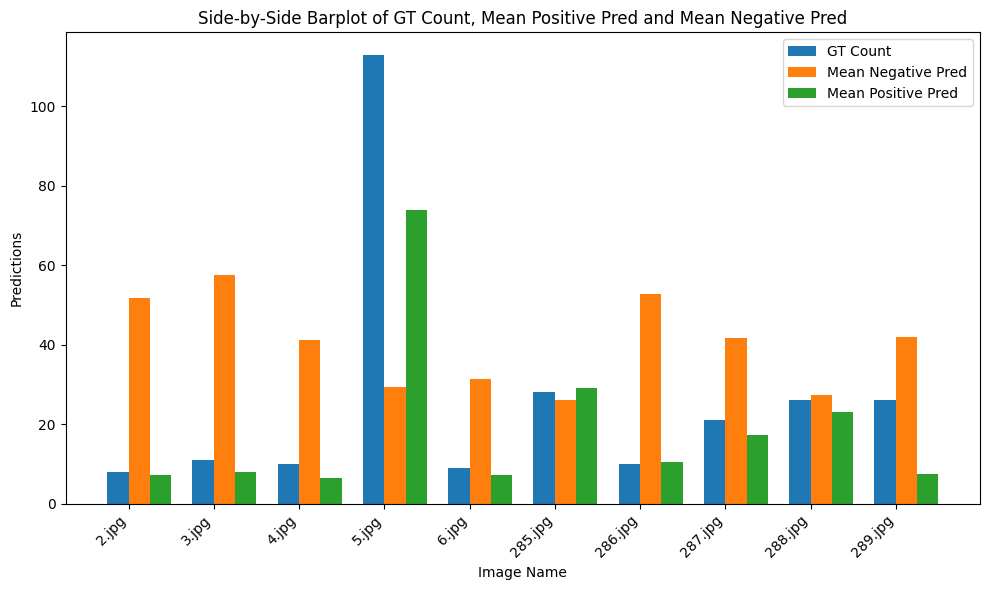

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = aggregation_df_head.index

plt.bar(index, aggregation_df_head['GT Count'], bar_width, label='GT Count')
plt.bar(index + bar_width, aggregation_df_head['Mean Negative Pred'], bar_width, label='Mean Negative Pred')
plt.bar(index + bar_width * 2, aggregation_df_head['Mean Positive Pred'], bar_width, label='Mean Positive Pred')

plt.xlabel('Image Name')
plt.ylabel('Predictions')
plt.title('Side-by-Side Barplot of GT Count, Mean Positive Pred and Mean Negative Pred')
plt.xticks(index + bar_width / 2, aggregation_df_head['Image Name'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
recall_mean = round(aggregation_df['Recall'].mean(), PRECISION)
precision_mean = round(aggregation_df['Precision'].mean(), PRECISION)
fscore_mean = round(aggregation_df['F-score'].mean(), PRECISION)

print(f"Recall: {recall_mean}")
print(f"Precision: {precision_mean}")
print(f"F-score: {fscore_mean}")

recall_std = round(aggregation_df['Recall'].std(), PRECISION)
precision_std = round(aggregation_df['Precision'].std(), PRECISION)

print(f"Recall std: {recall_std}")
print(f"Precision std: {precision_std}")

Recall: 0.78
Precision: 0.5
F-score: 0.57
Recall std: 0.225
Precision std: 0.185


In [36]:
# define statistics data
statistics_data = {
    'Model': ['CLIP-Count'],
    'AvgCntRecall': [recall_mean],
    'AvgCntPrecision': [precision_mean],
    'AvgCntFscore': [fscore_mean]
}
df_statistics = pd.DataFrame(statistics_data)

# path to the global CSV file
global_csv_path = '../Test2_models_metrics.csv'

# read the global CSV file if it exists, otherwise create an empty DataFrame
if os.path.exists(global_csv_path):
    df_global = pd.read_csv(global_csv_path)
else:
    df_global = pd.DataFrame()

# append the new statistics DataFrame to the global DataFrame and save
df_global = pd.concat([df_global, df_statistics], ignore_index=True)
df_global.to_csv(global_csv_path, index=False)